In [1]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
from stimuli import Figure5

NameError: name 'p' is not defined

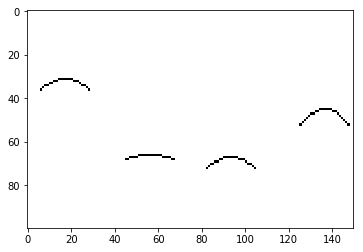

In [2]:
x = Figure5.curvature(flags=[False, True, False])[1]
pylab.imshow(x, cmap='Greys')
plt.imsave('4curvature.png', x, cmap='Greys')

In [3]:
from SobelDemo import sobel

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
y = plt.imread('dog.jpg')
y = rgb2gray(y)
x = sobel(y)
pylab.imshow(x, cmap='gist_gray')

FileNotFoundError: [Errno 2] No such file or directory: 'dog.jpg'

In [ ]:
p.imsave('sobels_dog.png', x, cmap='gist_gray')

In [6]:
from keras.datasets import mnist

Using TensorFlow backend.


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 38s 3us/step


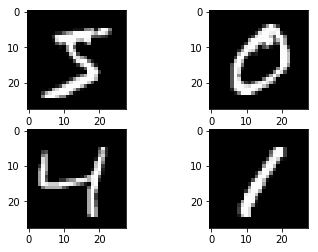

In [8]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [23]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [24]:
np.random.seed(6)

In [25]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [26]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [29]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 142s - loss: 0.2304 - acc: 0.9351 - val_loss: 0.0718 - val_acc: 0.9784
Epoch 2/10
 - 279s - loss: 0.0708 - acc: 0.9790 - val_loss: 0.0525 - val_acc: 0.9825
Epoch 3/10
 - 137s - loss: 0.0512 - acc: 0.9845 - val_loss: 0.0452 - val_acc: 0.9853
Epoch 4/10
 - 138s - loss: 0.0388 - acc: 0.9880 - val_loss: 0.0381 - val_acc: 0.9869
Epoch 5/10
 - 138s - loss: 0.0322 - acc: 0.9902 - val_loss: 0.0346 - val_acc: 0.9889
Epoch 6/10
 - 137s - loss: 0.0254 - acc: 0.9922 - val_loss: 0.0319 - val_acc: 0.9881
Epoch 7/10
 - 138s - loss: 0.0210 - acc: 0.9937 - val_loss: 0.0322 - val_acc: 0.9884
Epoch 8/10
 - 139s - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0315 - val_acc: 0.9901
Epoch 9/10
 - 137s - loss: 0.0148 - acc: 0.9951 - val_loss: 0.0320 - val_acc: 0.9886
Epoch 10/10
 - 155s - loss: 0.0134 - acc: 0.9954 - val_loss: 0.0347 - val_acc: 0.9881
CNN Error: 1.19%
